In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
l1 = ['PassengerId','Name','Ticket']

In [0]:
df_train.drop(l1,axis = 1,inplace = True)
df_test.drop(l1,axis = 1,inplace = True)

In [7]:
df_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [8]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df_train.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [10]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [0]:
l2  = ['Cabin']

In [0]:
df_train.drop(l2,axis = 1,inplace = True)
df_test.drop(l2,axis = 1,inplace = True)

In [13]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [0]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace = True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace = True)

In [16]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [0]:
df_train.dropna(inplace = True)

In [18]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [0]:
df_test.dropna(inplace = True)

In [21]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df_train[df_train['Survived']==1]['Sex']

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 340, dtype: object

In [0]:
def graph(s):
  survivers = df_train[df_train['Survived']==1][s].value_counts()
  dead = df_train[df_train['Survived']==0][s].value_counts()
  df = pd.DataFrame([survivers,dead])
  df.plot(kind = 'bar',stacked = True)

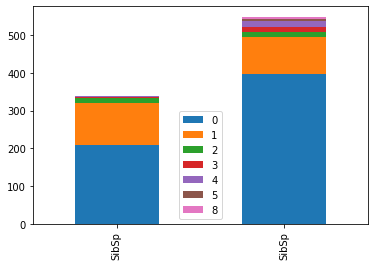

In [24]:
graph('SibSp')

In [0]:
from sklearn.preprocessing import LabelEncoder
le_S = LabelEncoder()
le_E = LabelEncoder()
df_train['Sex'] = le_S.fit_transform(df_train['Sex'])
df_train['Embarked'] = le_E.fit_transform(df_train['Embarked'])

In [26]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


In [27]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [0]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values
x_test = df_test.values


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_train)

In [30]:
x_train,x_test

(array([[ 0.82520863,  0.73534203, -0.59049493, ..., -0.47432585,
         -0.50023975,  0.58683958],
        [-1.57221121, -1.35991138,  0.64397101, ..., -0.47432585,
          0.78894661, -1.93955453],
        [ 0.82520863, -1.35991138, -0.28187844, ..., -0.47432585,
         -0.48664993,  0.58683958],
        ...,
        [ 0.82520863, -1.35991138,  0.00352373, ...,  2.00611934,
         -0.17408416,  0.58683958],
        [-1.57221121,  0.73534203, -0.28187844, ..., -0.47432585,
         -0.0422126 , -1.93955453],
        [ 0.82520863,  0.73534203,  0.18104628, ..., -0.47432585,
         -0.49017322, -0.67635748]]),
 array([[ 0.82520863,  0.73534203, -0.59049493, ..., -0.47432585,
         -0.50023975,  0.58683958],
        [-1.57221121, -1.35991138,  0.64397101, ..., -0.47432585,
          0.78894661, -1.93955453],
        [ 0.82520863, -1.35991138, -0.28187844, ..., -0.47432585,
         -0.48664993,  0.58683958],
        ...,
        [ 0.82520863, -1.35991138,  0.00352373, ...,  

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [32]:
((pred == y_train).sum()/pred.shape)*100

array([85.82677165])

In [33]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [34]:
print(clf.predict([[1,0,35.0,0,,5.00,0]]))

SyntaxError: ignored